In [1]:
import torch

from model import transformer_base, transformer_large, transformer_huge
from utils import get_loss_acc, count_parameters, prepare_data, draw_confusion_matrix

Transformer base:  Test Accuracy: 78.87%  n_parameters: 1600517
Transformer large: Test Accuracy: 83.10%  n_parameters: 9501701
Transformer huge:  Test Accuracy: 85.21%  n_parameters: 50479109


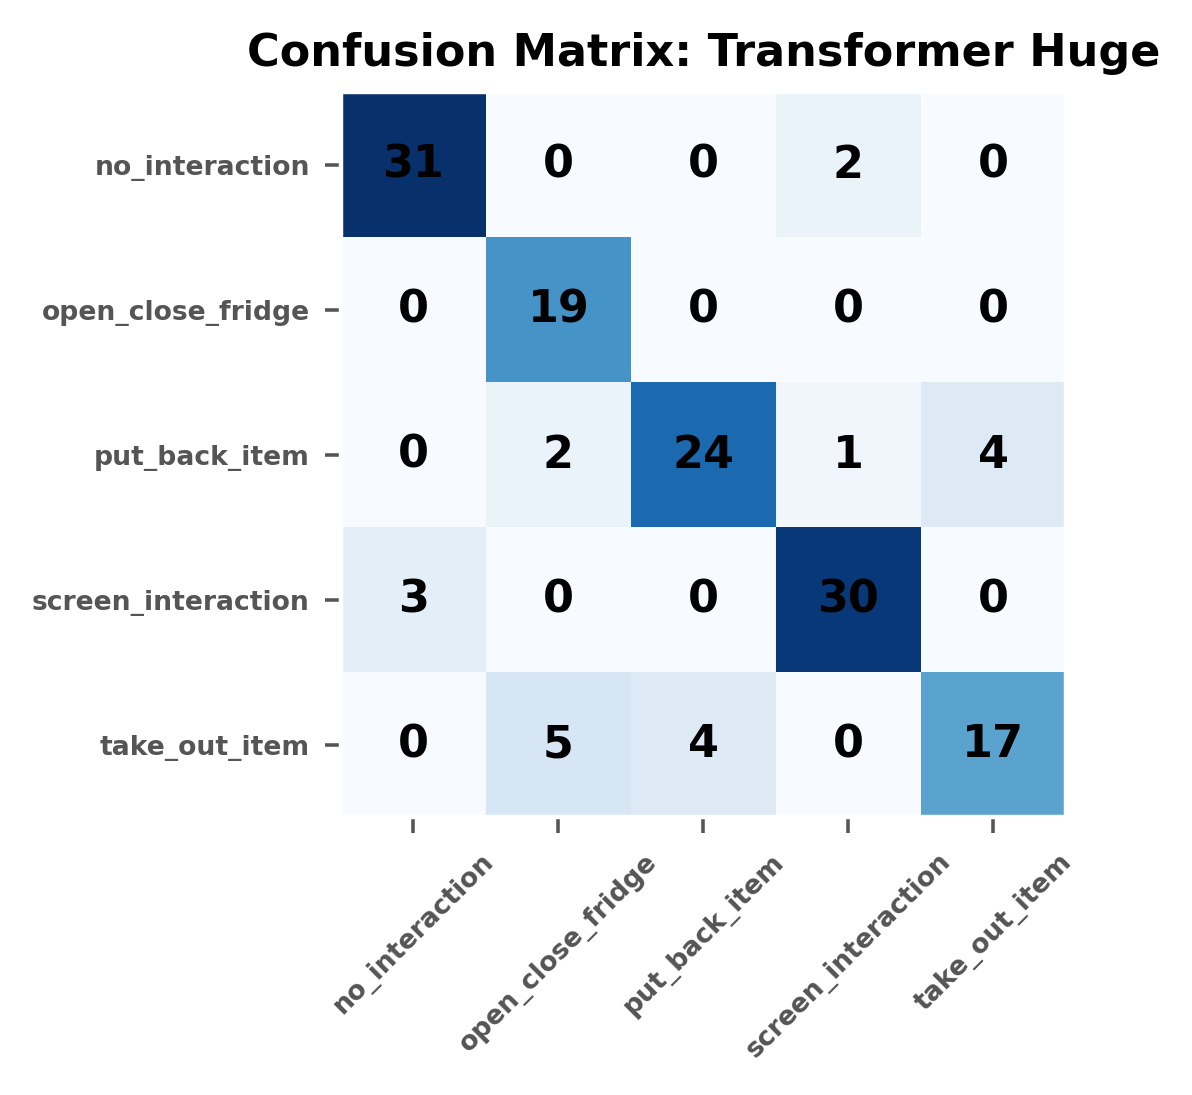

In [2]:
#prepare data
seed = 20220728
trainloader, testloader = prepare_data(test_ratio=0.15, seed=seed)

# prepare models
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model1 = transformer_base()
model1.to(device)
model1.load_state_dict(torch.load("Transformer_base.pth", map_location=device))

model2 = transformer_large()
model2.to(device)
model2.load_state_dict(torch.load("Transformer_large.pth", map_location=device))

model3 = transformer_huge()
model3.to(device)
model3.load_state_dict(torch.load("Transformer_huge.pth", map_location=device))

# evaluation
loss_function = torch.nn.CrossEntropyLoss()
loss1, acc1 = get_loss_acc(model1, testloader, loss_function)
loss2, acc2 = get_loss_acc(model2, testloader, loss_function)
loss3, acc3 = get_loss_acc(model3, testloader, loss_function)

# summary
n_param1 = count_parameters(model1)
n_param2 = count_parameters(model2)
n_param3 = count_parameters(model3)

print("Transformer base:  Test Accuracy: {:.2f}%  n_parameters: {}".format(acc1 * 100, n_param1))
print("Transformer large: Test Accuracy: {:.2f}%  n_parameters: {}".format(acc2 * 100, n_param2))
print("Transformer huge:  Test Accuracy: {:.2f}%  n_parameters: {}".format(acc3 * 100, n_param3))

y_true = testloader.dataset.Label.cpu().numpy()
logits3 = model3(testloader.dataset.Data.to(device))
y_pred3 = torch.argmax(logits3, dim=1).cpu().numpy()

draw_confusion_matrix(y_pred3, y_true, "Transformer Huge")